# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
import numpy as np

class RandomSampler():
    
    def __init__(self, vars):
        """Accepts definition of the set of variables to be sampled.
            
            Params:
                vars (list of lists): each item is a list containing:
                                        item 0 - either 'discrete', 'continuous-int' or 'continuous-float'
                                        items 1-N depend on the value of item 0:
                                        if discrete, then these are the set of values to be chosen from
                                        if continuous then these are the min & max bounds of the range
        """
        
        self.vars = vars
        
        self.rng = np.random.default_rng()
    
    
    def sample(self):
        """Draws a random sample of all variables at its disposal.
        
            Returns a list of values in the order of definition.
        """

        rtn = []
        for v in self.vars:
            if v[0] == "discrete":
                choice = self.rng.integers(low=1, high=len(v), size=1)[0]
                rtn.append(v[choice])
                
            elif v[0] == "continuous-int":
                choice = self.rng.integers(low=v[1], high=v[2], size=1)[0]
                rtn.append(choice)
                
            elif v[0] == "continuous-float":
                choice = self.rng.random() * (v[2]-v[1]) + v[1]
                rtn.append(choice)
            
            else:
                print("///// RandomSampler error:  unknown type ", v[0])
            
        return rtn
                
vars = [["discrete", 88, 66, 11, 22, 33, 44, 99, 101, 77],
        ["discrete", 500], #1-item list
        ["continuous-int", 43, 44], #1-item range
        ["continuous-int", 0, 10],
        ["continuous-float", 0.0, 1.0],
        ["continuous-float", -3.3, 0.0],
        ["continuous-float", -1.0, 6.4],
       ]
rs = RandomSampler(vars)

for i in range(3):
    out = rs.sample()
    print("\n", i, "\n", out)



 0 
 [22, 500, 43, 6, 0.8081822465614167, -1.0938740218862382, 4.0067590264265585]

 1 
 [77, 500, 43, 1, 0.20068025956540092, -1.1316156059219322, 1.7919918735151579]

 2 
 [66, 500, 43, 9, 0.4581339805963801, -0.7830020433421643, -0.5958391530896825]


Ready to train RE27 over 40 training sets for 20001 episodes each, with fixed params:
    Max episodes  =  20001
    Batch size    =  1000
    Weight decay  =  1e-05
    Gamma         =  0.99

///// Beginning training set  RE27.00  with:
      Bad step prob    = 0.0249
      Noise decay      = 0.999952
      Noise scale      = 0.049
      LR actor         = 0.000089
      LR critic        = 0.000034
      Learning every      22  time steps
      Learn iterations =  1
      Tau              = 0.00138
      Seed             =  44939
1996	Running avg/max: 0.000/0.000,  mem:   1660/    77 ( 4.6%), avg 1189.4 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   1662/    77 ( 4.6%), avg 1190.0 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   2348/    77 ( 3.3%), avg 1270.9 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   3060/    77 ( 2.5%), avg 1307.8 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   

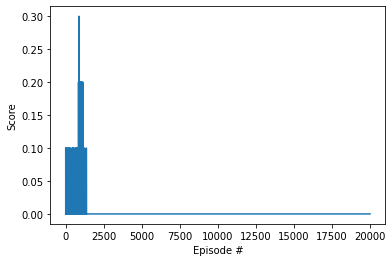


///// Beginning training set  RE27.01  with:
      Bad step prob    = 0.0330
      Noise decay      = 0.999964
      Noise scale      = 0.044
      LR actor         = 0.000024
      LR critic        = 0.000032
      Learning every      72  time steps
      Learn iterations =  4
      Tau              = 0.00175
      Seed             =  44939
2000	Average score:   0.005,        mem:   1992/   120 ( 6.0%), avg 1048.2 eps/min;  0.3 hr rem   
2627	Running avg/max: 0.000/0.000,  mem:   2297/   126 ( 5.5%), avg 1102.8 eps/min    *noise mult = 0.2
 *noise mult = 0.2
4000	Average score:   0.000,        mem:   2919/   126 ( 4.3%), avg 1171.1 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   3881/   126 ( 3.2%), avg 1203.0 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   4860/   126 ( 2.6%), avg 1221.2 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   5744/   126 ( 2.2%), avg 1241.4 eps/min;  0.1 hr rem   
12000	Average score:   0.000,       

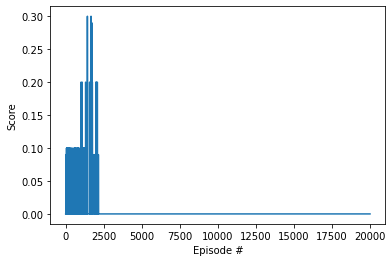


///// Beginning training set  RE27.02  with:
      Bad step prob    = 0.1874
      Noise decay      = 0.999937
      Noise scale      = 0.049
      LR actor         = 0.000034
      LR critic        = 0.000068
      Learning every      85  time steps
      Learn iterations =  1
      Tau              = 0.00237
      Seed             =  44939
1518	Running avg/max: 0.000/0.000,  mem:   4027/    23 ( 0.6%), avg 1099.2 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   5340/    23 ( 0.4%), avg 1123.7 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:  10624/    23 ( 0.2%), avg 1188.5 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15951/    23 ( 0.1%), avg 1211.2 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  19370/    23 ( 0.1%), avg 1216.4 eps/min;  0.2 hr rem   
8201	Running avg/max: 0.000/0.000,  mem:  19370/    23 ( 0.1%), avg 1214.1 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	A

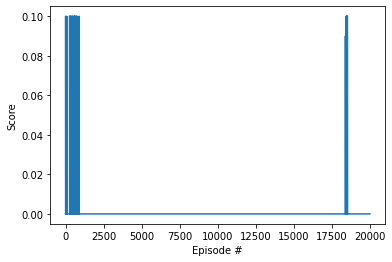


///// Beginning training set  RE27.03  with:
      Bad step prob    = 0.0202
      Noise decay      = 0.999907
      Noise scale      = 0.019
      LR actor         = 0.000011
      LR critic        = 0.000039
      Learning every      73  time steps
      Learn iterations =  2
      Tau              = 0.00094
      Seed             =  44939
1001	Running avg/max: 0.004/0.100,  mem:   1176/    28 ( 2.4%), avg 1091.1 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.004,        mem:   1552/    58 ( 3.7%), avg 1076.7 eps/min;  0.3 hr rem   
4000	Average score:   0.005,        mem:   2338/   108 ( 4.6%), avg 1053.2 eps/min;  0.3 hr rem   
4630	Running avg/max: 0.001/0.100,  mem:   2562/   124 ( 4.8%), avg 1059.4 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
6000	Average score:   0.001,        mem:   3142/   158 ( 5.0%), avg 1048.4 eps/min;  0.2 hr rem   
8000	Average score:   0.005,        mem:   3942/   211 ( 5.4%), avg 1033.5 eps/min;  0.2 hr rem   
10000	A

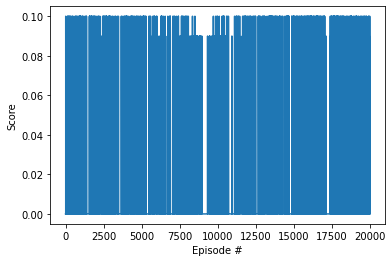


///// Beginning training set  RE27.04  with:
      Bad step prob    = 0.1127
      Noise decay      = 0.999981
      Noise scale      = 0.028
      LR actor         = 0.000054
      LR critic        = 0.000037
      Learning every      61  time steps
      Learn iterations =  3
      Tau              = 0.00299
      Seed             =  44939
2000	Average score:   0.000,        mem:   3475/    47 ( 1.4%), avg 774.9 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   6665/    47 ( 0.7%), avg 782.8 eps/min;  0.3 hr rem   
5750	Running avg/max: 0.000/0.000,  mem:   9453/    47 ( 0.5%), avg 783.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
6000	Average score:   0.000,        mem:   9844/    47 ( 0.5%), avg 786.2 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  13047/    47 ( 0.4%), avg 789.0 eps/min;  0.3 hr rem   
10000	Average score:   0.032,        mem:  15635/   261 ( 1.7%), avg 766.6 eps/min;  0.2 hr rem   
12000	Average score:   0.000,        mem: 

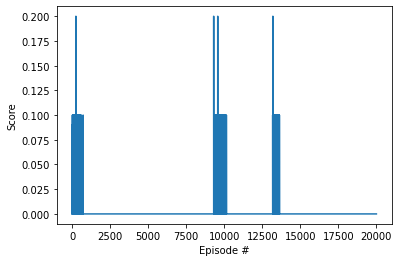


///// Beginning training set  RE27.05  with:
      Bad step prob    = 0.1448
      Noise decay      = 0.999936
      Noise scale      = 0.046
      LR actor         = 0.000049
      LR critic        = 0.000022
      Learning every      74  time steps
      Learn iterations =  3
      Tau              = 0.00056
      Seed             =  44939
1517	Running avg/max: 0.000/0.000,  mem:   3196/    23 ( 0.7%), avg 707.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   4226/    23 ( 0.5%), avg 723.7 eps/min;  0.4 hr rem   
4000	Average score:   0.017,        mem:   9101/   168 ( 1.8%), avg 688.6 eps/min;  0.4 hr rem   
6000	Average score:   0.000,        mem:  14175/   449 ( 3.2%), avg 674.5 eps/min;  0.3 hr rem   
7455	Running avg/max: 0.000/0.000,  mem:  17132/   449 ( 2.6%), avg 692.6 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  17238/   449 ( 2.6%), avg 694.2 eps/min;  0.3 hr rem   
10000	Average

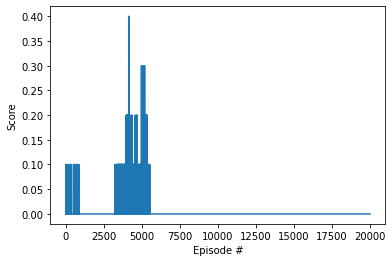


///// Beginning training set  RE27.06  with:
      Bad step prob    = 0.1042
      Noise decay      = 0.999971
      Noise scale      = 0.007
      LR actor         = 0.000038
      LR critic        = 0.000049
      Learning every      23  time steps
      Learn iterations =  4
      Tau              = 0.00109
      Seed             =  44939
2000	Average score:   0.000,        mem:   3286/     9 ( 0.3%), avg 390.6 eps/min;  0.8 hr rem   
3624	Running avg/max: 0.000/0.000,  mem:   5732/     9 ( 0.2%), avg 396.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
4000	Average score:   0.000,        mem:   6335/     9 ( 0.1%), avg 395.8 eps/min;  0.7 hr rem   
6000	Average score:   0.000,        mem:   9320/     9 ( 0.1%), avg 399.9 eps/min;  0.6 hr rem   
8000	Average score:   0.005,        mem:  12313/    47 ( 0.4%), avg 401.3 eps/min;  0.5 hr rem   
10000	Average score:   0.010,        mem:  15208/    71 ( 0.5%), avg 400.5 eps/min;  0.4 hr rem   
12000	Average score:   0.000,        mem: 

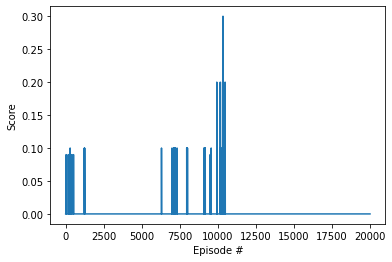


///// Beginning training set  RE27.07  with:
      Bad step prob    = 0.0865
      Noise decay      = 0.999966
      Noise scale      = 0.040
      LR actor         = 0.000080
      LR critic        = 0.000046
      Learning every      37  time steps
      Learn iterations =  4
      Tau              = 0.00253
      Seed             =  44939
2000	Average score:   0.000,        mem:   2754/    11 ( 0.4%), avg 611.0 eps/min;  0.5 hr rem   
3187	Running avg/max: 0.000/0.000,  mem:   4274/    18 ( 0.4%), avg 608.7 eps/min    *noise mult = 0.2
 *noise mult = 0.2
4000	Average score:   0.000,        mem:   5261/    18 ( 0.3%), avg 613.1 eps/min;  0.4 hr rem   
6000	Average score:   0.000,        mem:   7729/    18 ( 0.2%), avg 616.0 eps/min;  0.4 hr rem   
8000	Average score:   0.000,        mem:  10223/    18 ( 0.2%), avg 617.7 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:  12881/   112 ( 0.9%), avg 610.6 eps/min;  0.3 hr rem   
12000	Average score:   0.000,        mem: 

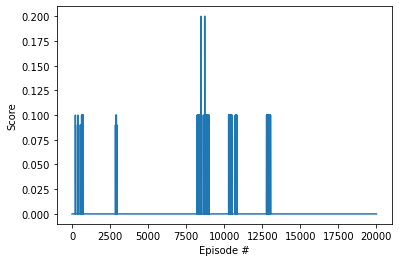


///// Beginning training set  RE27.08  with:
      Bad step prob    = 0.1051
      Noise decay      = 0.999997
      Noise scale      = 0.041
      LR actor         = 0.000074
      LR critic        = 0.000025
      Learning every      62  time steps
      Learn iterations =  3
      Tau              = 0.00235
      Seed             =  44939
2000	Average score:   0.000,        mem:   3287/    10 ( 0.3%), avg 786.9 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   6362/    10 ( 0.2%), avg 804.6 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   9281/    10 ( 0.1%), avg 813.1 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  12222/    10 ( 0.1%), avg 817.3 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  15253/    10 ( 0.1%), avg 818.9 eps/min;  0.2 hr rem   
12000	Average score:   0.000,        mem:  15253/    10 ( 0.1%), avg 819.6 eps/min;  0.2 hr rem   
14000	Average score:   0.000,        mem:  15253/    10 ( 0.1%), 

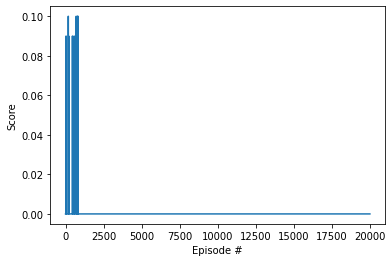


///// Beginning training set  RE27.09  with:
      Bad step prob    = 0.1961
      Noise decay      = 0.999943
      Noise scale      = 0.035
      LR actor         = 0.000078
      LR critic        = 0.000041
      Learning every      60  time steps
      Learn iterations =  4
      Tau              = 0.00109
      Seed             =  44939
1871	Running avg/max: 0.000/0.000,  mem:   4577/     2 ( 0.0%), avg 508.4 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   4954/     2 ( 0.0%), avg 507.3 eps/min;  0.6 hr rem   
4000	Average score:   0.000,        mem:  10603/     2 ( 0.0%), avg 505.5 eps/min;  0.5 hr rem   
6000	Average score:   0.000,        mem:  16046/     2 ( 0.0%), avg 510.4 eps/min;  0.5 hr rem   
8000	Average score:   0.000,        mem:  19805/     2 ( 0.0%), avg 510.3 eps/min;  0.4 hr rem   
9256	Running avg/max: 0.000/0.000,  mem:  19805/     2 ( 0.0%), avg 509.8 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	Average

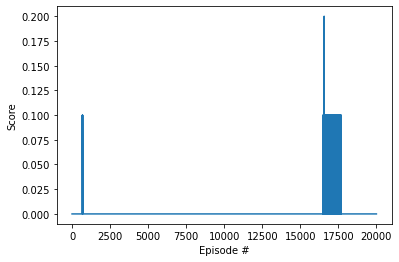


///// Beginning training set  RE27.10  with:
      Bad step prob    = 0.1048
      Noise decay      = 0.999945
      Noise scale      = 0.029
      LR actor         = 0.000032
      LR critic        = 0.000043
      Learning every      80  time steps
      Learn iterations =  3
      Tau              = 0.00285
      Seed             =  44939
1754	Running avg/max: 0.000/0.000,  mem:   3094/    91 ( 2.9%), avg 829.3 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   3437/    91 ( 2.6%), avg 836.6 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   6444/    91 ( 1.4%), avg 866.2 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   9472/    91 ( 1.0%), avg 878.7 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  12401/    91 ( 0.7%), avg 887.2 eps/min;  0.2 hr rem   
9432	Running avg/max: 0.000/0.000,  mem:  14569/    91 ( 0.6%), avg 889.8 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	Average

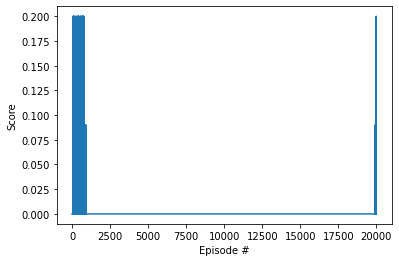


///// Beginning training set  RE27.11  with:
      Bad step prob    = 0.1532
      Noise decay      = 0.999952
      Noise scale      = 0.006
      LR actor         = 0.000064
      LR critic        = 0.000042
      Learning every      54  time steps
      Learn iterations =  2
      Tau              = 0.00117
      Seed             =  44939
2000	Average score:   0.000,        mem:   4398/    58 ( 1.3%), avg 751.9 eps/min;  0.4 hr rem   
2130	Running avg/max: 0.000/0.000,  mem:   4669/    58 ( 1.2%), avg 752.2 eps/min    *noise mult = 0.2
 *noise mult = 0.2
4000	Average score:   0.000,        mem:   8724/    58 ( 0.7%), avg 771.1 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:  13121/    58 ( 0.4%), avg 775.9 eps/min;  0.3 hr rem   
8000	Average score:   0.005,        mem:  17594/    72 ( 0.4%), avg 772.9 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:  17657/   337 ( 1.9%), avg 730.5 eps/min;  0.2 hr rem   
10302	Running avg/max: 0.000/0.000,  mem: 

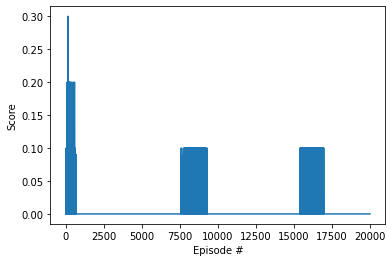


///// Beginning training set  RE27.12  with:
      Bad step prob    = 0.0822
      Noise decay      = 0.999934
      Noise scale      = 0.003
      LR actor         = 0.000026
      LR critic        = 0.000039
      Learning every      52  time steps
      Learn iterations =  2
      Tau              = 0.00207
      Seed             =  44939
1400	Running avg/max: 0.007/0.100,  mem:   2151/    18 ( 0.8%), avg 813.2 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   2971/    41 ( 1.4%), avg 826.6 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   5271/    41 ( 0.8%), avg 906.9 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   7576/    41 ( 0.5%), avg 928.4 eps/min;  0.3 hr rem   
7693	Running avg/max: 0.000/0.000,  mem:   9590/    41 ( 0.4%), avg 897.2 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:   9936/    41 ( 0.4%), avg 893.8 eps/min;  0.2 hr rem   
10000	Average

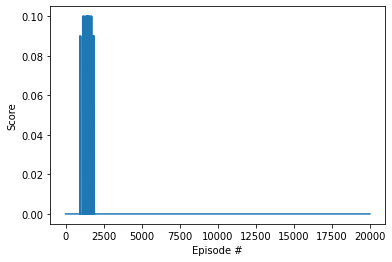


///// Beginning training set  RE27.13  with:
      Bad step prob    = 0.0929
      Noise decay      = 0.999989
      Noise scale      = 0.035
      LR actor         = 0.000019
      LR critic        = 0.000060
      Learning every      28  time steps
      Learn iterations =  4
      Tau              = 0.00155
      Seed             =  44939
2000	Average score:   0.000,        mem:   3182/    74 ( 2.3%), avg 457.6 eps/min;  0.7 hr rem   
4000	Average score:   0.000,        mem:   5850/    74 ( 1.3%), avg 480.5 eps/min;  0.6 hr rem   
6000	Average score:   0.000,        mem:   8463/    74 ( 0.9%), avg 488.6 eps/min;  0.5 hr rem   
8000	Average score:   0.000,        mem:  11085/    74 ( 0.7%), avg 495.5 eps/min;  0.4 hr rem   
9573	Running avg/max: 0.000/0.000,  mem:  13178/    74 ( 0.6%), avg 497.6 eps/min    *noise mult = 0.2
 *noise mult = 0.2
10000	Average score:   0.000,        mem:  13723/    74 ( 0.5%), avg 498.2 eps/min;  0.3 hr rem   
12000	Average score:   0.000,        mem: 

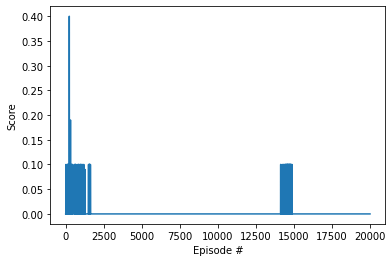


///// Beginning training set  RE27.14  with:
      Bad step prob    = 0.1022
      Noise decay      = 0.999926
      Noise scale      = 0.004
      LR actor         = 0.000085
      LR critic        = 0.000050
      Learning every      52  time steps
      Learn iterations =  1
      Tau              = 0.00098
      Seed             =  44939
1202	Running avg/max: 0.000/0.000,  mem:   2245/    82 ( 3.7%), avg 871.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   3406/    82 ( 2.4%), avg 973.4 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   6272/    82 ( 1.3%), avg 1035.1 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   9247/    82 ( 0.9%), avg 1050.1 eps/min;  0.2 hr rem   
6916	Running avg/max: 0.000/0.000,  mem:  10577/    82 ( 0.8%), avg 1056.8 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  12093/    82 ( 0.7%), avg 1063.7 eps/min;  0.2 hr rem   
10000	Ave

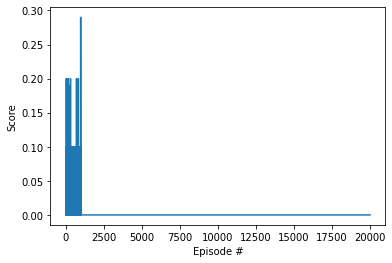


///// Beginning training set  RE27.15  with:
      Bad step prob    = 0.1422
      Noise decay      = 0.999916
      Noise scale      = 0.043
      LR actor         = 0.000044
      LR critic        = 0.000043
      Learning every      97  time steps
      Learn iterations =  1
      Tau              = 0.00275
      Seed             =  44939
1009	Running avg/max: 0.008/0.100,  mem:   2350/    67 ( 2.9%), avg 741.1 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.003,        mem:   4819/   113 ( 2.3%), avg 797.5 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   8926/   131 ( 1.5%), avg 917.6 eps/min;  0.3 hr rem   
5771	Running avg/max: 0.000/0.000,  mem:  12451/   131 ( 1.1%), avg 970.4 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
6000	Average score:   0.000,        mem:  12912/   131 ( 1.0%), avg 975.5 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  16876/   131 ( 0.8%), avg 1021.5 eps/min;  0.2 hr rem   
10000	Averag

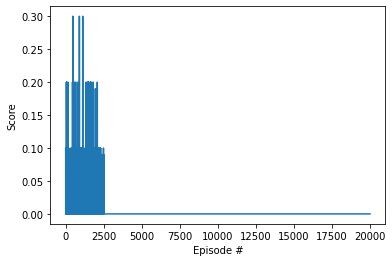


///// Beginning training set  RE27.16  with:
      Bad step prob    = 0.0584
      Noise decay      = 0.999909
      Noise scale      = 0.038
      LR actor         = 0.000055
      LR critic        = 0.000018
      Learning every      75  time steps
      Learn iterations =  4
      Tau              = 0.00190
      Seed             =  44939
971	Running avg/max: 0.000/0.000,  mem:   1483/    24 ( 1.6%), avg 838.0 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   2331/    25 ( 1.1%), avg 933.0 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   3994/    25 ( 0.6%), avg 952.3 eps/min;  0.3 hr rem   
5619	Running avg/max: 0.000/0.000,  mem:   5305/    25 ( 0.5%), avg 961.7 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
6000	Average score:   0.000,        mem:   5639/    25 ( 0.4%), avg 961.5 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   7369/    25 ( 0.3%), avg 965.9 eps/min;  0.2 hr rem   
10000	Average 

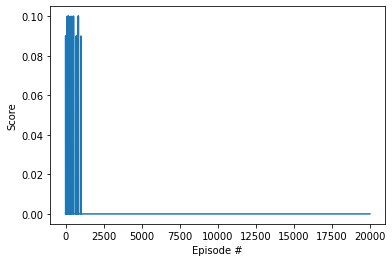


///// Beginning training set  RE27.17  with:
      Bad step prob    = 0.0206
      Noise decay      = 0.999983
      Noise scale      = 0.046
      LR actor         = 0.000088
      LR critic        = 0.000019
      Learning every      29  time steps
      Learn iterations =  2
      Tau              = 0.00165
      Seed             =  44939
2000	Average score:   0.000,        mem:   1542/    51 ( 3.3%), avg 963.8 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   2119/    51 ( 2.4%), avg 1074.7 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   2644/    51 ( 1.9%), avg 1113.1 eps/min;  0.2 hr rem   
6202	Running avg/max: 0.000/0.000,  mem:   2719/    51 ( 1.9%), avg 1112.8 eps/min    *noise mult = 0.2
 *noise mult = 0.2
8000	Average score:   0.000,        mem:   3205/    51 ( 1.6%), avg 1126.3 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   3809/    51 ( 1.3%), avg 1128.7 eps/min;  0.1 hr rem   
12000	Average score:   0.000,        

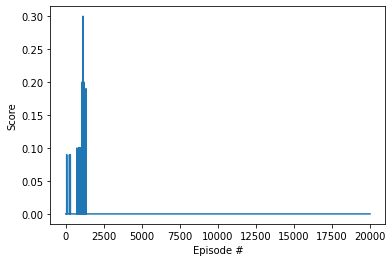


///// Beginning training set  RE27.18  with:
      Bad step prob    = 0.1924
      Noise decay      = 0.999949
      Noise scale      = 0.007
      LR actor         = 0.000027
      LR critic        = 0.000045
      Learning every      26  time steps
      Learn iterations =  4
      Tau              = 0.00052
      Seed             =  44939
1986	Running avg/max: 0.000/0.000,  mem:   5157/    25 ( 0.5%), avg 279.4 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   5198/    25 ( 0.5%), avg 278.6 eps/min;  1.1 hr rem   
4000	Average score:   0.005,        mem:  11044/   134 ( 1.2%), avg 272.8 eps/min;  1.0 hr rem   
6000	Average score:   0.012,        mem:  16602/   163 ( 1.0%), avg 276.1 eps/min;  0.8 hr rem   
8000	Average score:   0.017,        mem:  19620/   241 ( 1.2%), avg 275.5 eps/min;  0.7 hr rem   
9905	Running avg/max: 0.000/0.000,  mem:  19620/   267 ( 1.4%), avg 275.2 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	Average

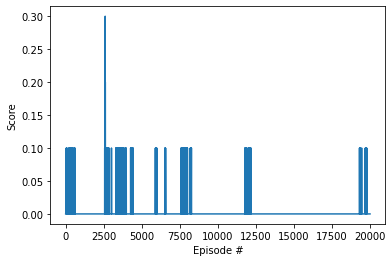


///// Beginning training set  RE27.19  with:
      Bad step prob    = 0.1755
      Noise decay      = 0.999945
      Noise scale      = 0.023
      LR actor         = 0.000100
      LR critic        = 0.000073
      Learning every      28  time steps
      Learn iterations =  1
      Tau              = 0.00212
      Seed             =  44939
2000	Average score:   0.000,        mem:   4445/     0 ( 0.0%), avg 740.7 eps/min;  0.4 hr rem   
2010	Running avg/max: 0.000/0.000,  mem:   4467/     0 ( 0.0%), avg 740.1 eps/min    *noise mult = 0.2
 *noise mult = 0.2
4000	Average score:   0.000,        mem:   9511/     0 ( 0.0%), avg 727.2 eps/min;  0.4 hr rem   
6000	Average score:   0.000,        mem:  14597/    16 ( 0.1%), avg 730.2 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  18773/    16 ( 0.1%), avg 734.1 eps/min;  0.3 hr rem   
9710	Running avg/max: 0.000/0.000,  mem:  18773/    16 ( 0.1%), avg 737.8 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	Average

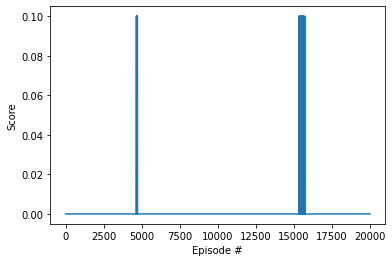


///// Beginning training set  RE27.20  with:
      Bad step prob    = 0.0886
      Noise decay      = 0.999933
      Noise scale      = 0.042
      LR actor         = 0.000047
      LR critic        = 0.000031
      Learning every      31  time steps
      Learn iterations =  4
      Tau              = 0.00137
      Seed             =  44939
1318	Running avg/max: 0.000/0.000,  mem:   2194/    42 ( 1.9%), avg 473.8 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   3015/    42 ( 1.4%), avg 517.2 eps/min;  0.6 hr rem   
4000	Average score:   0.000,        mem:   5588/    42 ( 0.8%), avg 533.7 eps/min;  0.5 hr rem   
6000	Average score:   0.000,        mem:   8117/    42 ( 0.5%), avg 540.2 eps/min;  0.4 hr rem   
7642	Running avg/max: 0.000/0.000,  mem:  10157/    42 ( 0.4%), avg 544.4 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  10568/    42 ( 0.4%), avg 547.2 eps/min;  0.4 hr rem   
10000	Average

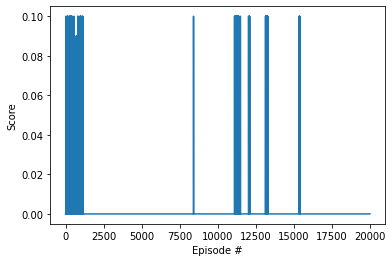


///// Beginning training set  RE27.21  with:
      Bad step prob    = 0.0753
      Noise decay      = 0.999984
      Noise scale      = 0.022
      LR actor         = 0.000064
      LR critic        = 0.000020
      Learning every      89  time steps
      Learn iterations =  3
      Tau              = 0.00251
      Seed             =  44939
2000	Average score:   0.000,        mem:   2669/    73 ( 2.7%), avg 943.1 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   4884/    73 ( 1.5%), avg 987.0 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   6912/    73 ( 1.1%), avg 1009.9 eps/min;  0.2 hr rem   
6978	Running avg/max: 0.000/0.000,  mem:   8027/    73 ( 0.9%), avg 1007.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
8000	Average score:   0.000,        mem:   9122/    73 ( 0.8%), avg 1012.3 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  11212/    73 ( 0.7%), avg 1020.7 eps/min;  0.2 hr rem   
12000	Average score:   0.000,        m

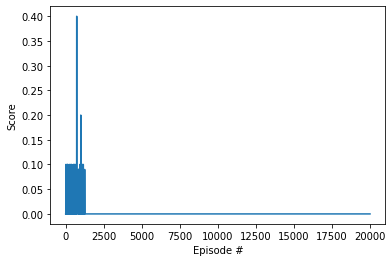


///// Beginning training set  RE27.22  with:
      Bad step prob    = 0.0671
      Noise decay      = 0.999980
      Noise scale      = 0.029
      LR actor         = 0.000093
      LR critic        = 0.000070
      Learning every      86  time steps
      Learn iterations =  3
      Tau              = 0.00065
      Seed             =  44939
2000	Average score:   0.000,        mem:   2481/    72 ( 2.9%), avg 988.1 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   4296/    72 ( 1.7%), avg 1026.9 eps/min;  0.3 hr rem   
5562	Running avg/max: 0.000/0.000,  mem:   5829/    72 ( 1.2%), avg 1029.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
6000	Average score:   0.000,        mem:   6251/    72 ( 1.2%), avg 1031.4 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   8191/    72 ( 0.9%), avg 1040.6 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  10198/    72 ( 0.7%), avg 1041.1 eps/min;  0.2 hr rem   
12000	Average score:   0.000,        

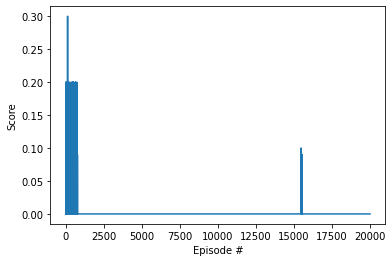


///// Beginning training set  RE27.23  with:
      Bad step prob    = 0.1837
      Noise decay      = 0.999980
      Noise scale      = 0.035
      LR actor         = 0.000047
      LR critic        = 0.000080
      Learning every      77  time steps
      Learn iterations =  4
      Tau              = 0.00166
      Seed             =  44939
2000	Average score:   0.000,        mem:   4578/     7 ( 0.2%), avg 608.4 eps/min;  0.5 hr rem   
4000	Average score:   0.000,        mem:   9896/    12 ( 0.1%), avg 598.0 eps/min;  0.4 hr rem   
5341	Running avg/max: 0.000/0.000,  mem:  13323/    12 ( 0.1%), avg 605.4 eps/min    *noise mult = 0.2
 *noise mult = 0.2
6000	Average score:   0.000,        mem:  15021/    12 ( 0.1%), avg 606.5 eps/min;  0.4 hr rem   
8000	Average score:   0.000,        mem:  19187/    14 ( 0.1%), avg 607.3 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:  19187/    14 ( 0.1%), avg 610.1 eps/min;  0.3 hr rem   
12000	Average score:   0.000,        mem: 

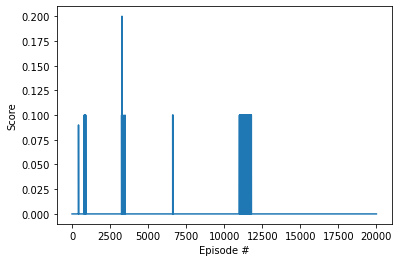


///// Beginning training set  RE27.24  with:
      Bad step prob    = 0.0834
      Noise decay      = 0.999935
      Noise scale      = 0.037
      LR actor         = 0.000088
      LR critic        = 0.000063
      Learning every      29  time steps
      Learn iterations =  2
      Tau              = 0.00080
      Seed             =  44939
1463	Running avg/max: 0.000/0.000,  mem:   2205/    18 ( 0.8%), avg 702.3 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   2826/    18 ( 0.6%), avg 733.1 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   5253/    18 ( 0.3%), avg 754.2 eps/min;  0.4 hr rem   
6000	Average score:   0.000,        mem:   7677/    18 ( 0.2%), avg 760.6 eps/min;  0.3 hr rem   
7938	Running avg/max: 0.000/0.000,  mem:   9998/    18 ( 0.2%), avg 766.3 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  10080/    18 ( 0.2%), avg 765.3 eps/min;  0.3 hr rem   
10000	Average

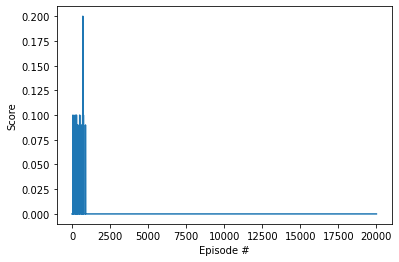


///// Beginning training set  RE27.25  with:
      Bad step prob    = 0.0284
      Noise decay      = 0.999993
      Noise scale      = 0.014
      LR actor         = 0.000076
      LR critic        = 0.000005
      Learning every      90  time steps
      Learn iterations =  4
      Tau              = 0.00070
      Seed             =  44939
2000	Average score:   0.000,        mem:   1665/    38 ( 2.3%), avg 1118.2 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   2519/    38 ( 1.5%), avg 1167.8 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   3345/    38 ( 1.1%), avg 1171.5 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   4162/    38 ( 0.9%), avg 1177.6 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   5018/    38 ( 0.8%), avg 1177.0 eps/min;  0.1 hr rem   
12000	Average score:   0.009,        mem:   5904/    92 ( 1.6%), avg 1172.6 eps/min;  0.1 hr rem   
14000	Average score:   0.011,        mem:   6999/   290 ( 4

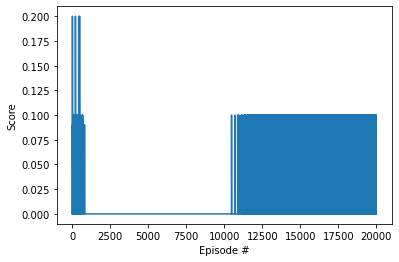


///// Beginning training set  RE27.26  with:
      Bad step prob    = 0.1478
      Noise decay      = 0.999976
      Noise scale      = 0.034
      LR actor         = 0.000019
      LR critic        = 0.000059
      Learning every      90  time steps
      Learn iterations =  4
      Tau              = 0.00135
      Seed             =  44939
2000	Average score:   0.000,        mem:   4211/    88 ( 2.1%), avg 710.5 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   8460/    88 ( 1.0%), avg 718.1 eps/min;  0.4 hr rem   
4571	Running avg/max: 0.002/0.200,  mem:   9761/    95 ( 1.0%), avg 706.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
6000	Average score:   0.000,        mem:  12700/    95 ( 0.7%), avg 716.2 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  17131/   115 ( 0.7%), avg 712.5 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:  17391/   115 ( 0.7%), avg 719.9 eps/min;  0.2 hr rem   
12000	Average score:   0.013,        mem: 

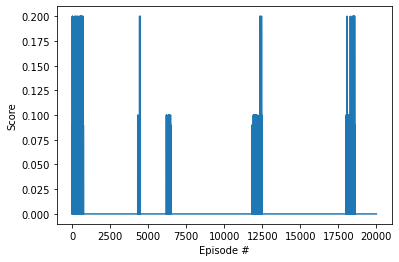


///// Beginning training set  RE27.27  with:
      Bad step prob    = 0.1672
      Noise decay      = 0.999935
      Noise scale      = 0.007
      LR actor         = 0.000020
      LR critic        = 0.000019
      Learning every      43  time steps
      Learn iterations =  3
      Tau              = 0.00239
      Seed             =  44939
1492	Running avg/max: 0.000/0.000,  mem:   3475/    47 ( 1.4%), avg 482.3 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   4712/    47 ( 1.0%), avg 502.1 eps/min;  0.6 hr rem   
4000	Average score:   0.000,        mem:   9488/    47 ( 0.5%), avg 528.1 eps/min;  0.5 hr rem   
6000	Average score:   0.000,        mem:  14198/    47 ( 0.3%), avg 532.2 eps/min;  0.4 hr rem   
7980	Running avg/max: 0.000/0.000,  mem:  18358/    47 ( 0.3%), avg 536.2 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  18358/    47 ( 0.3%), avg 536.3 eps/min;  0.4 hr rem   
10000	Average

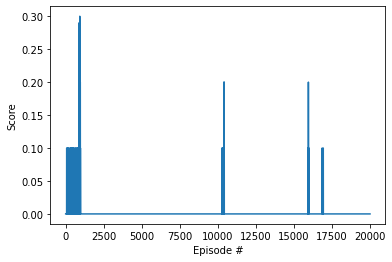


///// Beginning training set  RE27.28  with:
      Bad step prob    = 0.0380
      Noise decay      = 0.999991
      Noise scale      = 0.024
      LR actor         = 0.000027
      LR critic        = 0.000023
      Learning every      81  time steps
      Learn iterations =  3
      Tau              = 0.00256
      Seed             =  44939
2000	Average score:   0.001,        mem:   1911/     7 ( 0.4%), avg 957.5 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   3213/    51 ( 1.6%), avg 1017.4 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   4300/    51 ( 1.2%), avg 1007.1 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   5392/    51 ( 0.9%), avg 1041.4 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   6404/    51 ( 0.8%), avg 1067.2 eps/min;  0.2 hr rem   
11717	Running avg/max: 0.000/0.000,  mem:   7332/    51 ( 0.7%), avg 1080.2 eps/min    *noise mult = 0.2
 *noise mult = 0.2
12000	Average score:   0.000,       

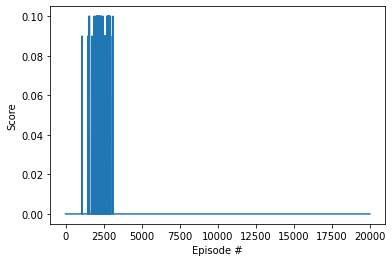


///// Beginning training set  RE27.29  with:
      Bad step prob    = 0.0890
      Noise decay      = 0.999996
      Noise scale      = 0.050
      LR actor         = 0.000033
      LR critic        = 0.000053
      Learning every      84  time steps
      Learn iterations =  4
      Tau              = 0.00228
      Seed             =  44939
2000	Average score:   0.000,        mem:   2885/    10 ( 0.3%), avg 774.5 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   5440/    13 ( 0.2%), avg 794.6 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   7963/    13 ( 0.2%), avg 811.3 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  10440/    13 ( 0.1%), avg 826.9 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  12935/    13 ( 0.1%), avg 839.3 eps/min;  0.2 hr rem   
12000	Average score:   0.000,        mem:  14448/    13 ( 0.1%), avg 843.4 eps/min;  0.2 hr rem   
14000	Average score:   0.000,        mem:  14448/    13 ( 0.1%), 

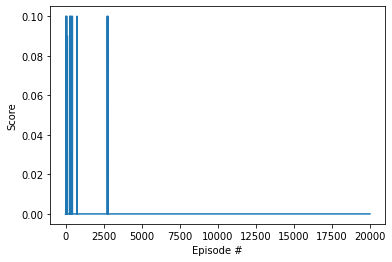


///// Beginning training set  RE27.30  with:
      Bad step prob    = 0.0677
      Noise decay      = 0.999942
      Noise scale      = 0.048
      LR actor         = 0.000019
      LR critic        = 0.000051
      Learning every      29  time steps
      Learn iterations =  4
      Tau              = 0.00076
      Seed             =  44939
1660	Running avg/max: 0.000/0.000,  mem:   2298/    81 ( 3.5%), avg 541.3 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   2609/    81 ( 3.1%), avg 561.7 eps/min;  0.5 hr rem   
4000	Average score:   0.000,        mem:   4500/    81 ( 1.8%), avg 595.5 eps/min;  0.4 hr rem   
6000	Average score:   0.000,        mem:   6476/    81 ( 1.3%), avg 601.0 eps/min;  0.4 hr rem   
8000	Average score:   0.000,        mem:   8369/    81 ( 1.0%), avg 607.4 eps/min;  0.3 hr rem   
8973	Running avg/max: 0.000/0.000,  mem:   9262/    81 ( 0.9%), avg 610.3 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	Average

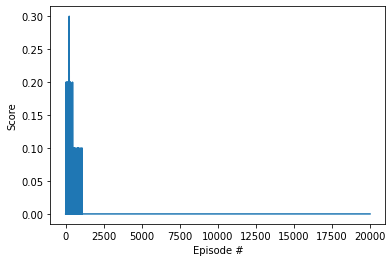


///// Beginning training set  RE27.31  with:
      Bad step prob    = 0.0325
      Noise decay      = 0.999975
      Noise scale      = 0.038
      LR actor         = 0.000013
      LR critic        = 0.000044
      Learning every      20  time steps
      Learn iterations =  1
      Tau              = 0.00181
      Seed             =  44939
2000	Average score:   0.001,        mem:   1714/    64 ( 3.7%), avg 1061.2 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   2727/    72 ( 2.6%), avg 1087.8 eps/min;  0.2 hr rem   
4257	Running avg/max: 0.000/0.000,  mem:   2856/    72 ( 2.5%), avg 1090.2 eps/min    *noise mult = 0.2
 *noise mult = 0.2
6000	Average score:   0.000,        mem:   3666/    72 ( 2.0%), avg 1098.5 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   4666/    72 ( 1.5%), avg 1090.8 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   5679/    72 ( 1.3%), avg 1092.4 eps/min;  0.2 hr rem   
12000	Average score:   0.000,       

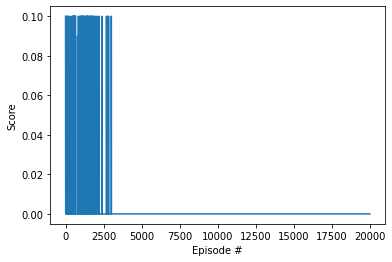


///// Beginning training set  RE27.32  with:
      Bad step prob    = 0.0434
      Noise decay      = 0.999975
      Noise scale      = 0.022
      LR actor         = 0.000058
      LR critic        = 0.000015
      Learning every      96  time steps
      Learn iterations =  4
      Tau              = 0.00082
      Seed             =  44939
2000	Average score:   0.000,        mem:   2076/    62 ( 3.0%), avg 980.3 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   3343/    62 ( 1.9%), avg 1052.5 eps/min;  0.3 hr rem   
4127	Running avg/max: 0.000/0.000,  mem:   3414/    62 ( 1.8%), avg 1060.2 eps/min    *noise mult = 0.2
 *noise mult = 0.2
6000	Average score:   0.000,        mem:   4538/    62 ( 1.4%), avg 1074.5 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   5842/    62 ( 1.1%), avg 1084.1 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   7160/    62 ( 0.9%), avg 1084.9 eps/min;  0.2 hr rem   
12000	Average score:   0.000,        

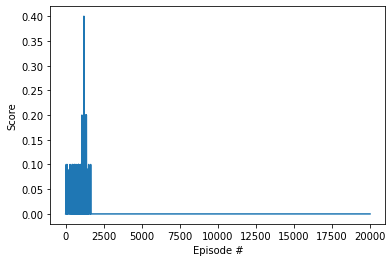


///// Beginning training set  RE27.33  with:
      Bad step prob    = 0.0283
      Noise decay      = 0.999973
      Noise scale      = 0.013
      LR actor         = 0.000051
      LR critic        = 0.000048
      Learning every      80  time steps
      Learn iterations =  4
      Tau              = 0.00194
      Seed             =  44939
2000	Average score:   0.000,        mem:   1814/   113 ( 6.2%), avg 921.4 eps/min;  0.3 hr rem   
3659	Running avg/max: 0.000/0.000,  mem:   2493/   113 ( 4.5%), avg 1046.9 eps/min    *noise mult = 0.2
 *noise mult = 0.2
4000	Average score:   0.000,        mem:   2624/   113 ( 4.3%), avg 1054.9 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   3396/   113 ( 3.3%), avg 1098.0 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   4219/   113 ( 2.7%), avg 1107.3 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   5039/   113 ( 2.2%), avg 1115.9 eps/min;  0.1 hr rem   
12000	Average score:   0.000,        

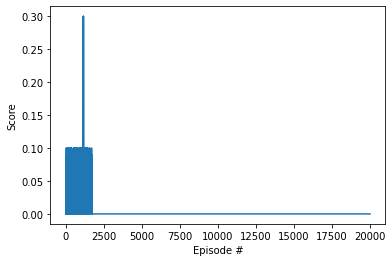


///// Beginning training set  RE27.34  with:
      Bad step prob    = 0.0882
      Noise decay      = 0.999922
      Noise scale      = 0.050
      LR actor         = 0.000021
      LR critic        = 0.000032
      Learning every      64  time steps
      Learn iterations =  3
      Tau              = 0.00120
      Seed             =  44939
1141	Running avg/max: 0.008/0.200,  mem:   1975/    99 ( 5.0%), avg 728.1 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   3105/   116 ( 3.7%), avg 795.1 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   5640/   116 ( 2.1%), avg 846.7 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   8107/   116 ( 1.4%), avg 865.9 eps/min;  0.3 hr rem   
6470	Running avg/max: 0.002/0.100,  mem:   8686/   119 ( 1.4%), avg 865.8 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  10684/   123 ( 1.2%), avg 867.2 eps/min;  0.2 hr rem   
10000	Average

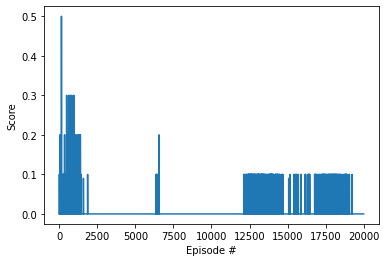


///// Beginning training set  RE27.35  with:
      Bad step prob    = 0.0302
      Noise decay      = 0.999951
      Noise scale      = 0.023
      LR actor         = 0.000084
      LR critic        = 0.000054
      Learning every      38  time steps
      Learn iterations =  1
      Tau              = 0.00200
      Seed             =  44939
1745	Running avg/max: 0.007/0.100,  mem:   1684/    59 ( 3.5%), avg 909.5 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.005,        mem:   1815/    74 ( 4.1%), avg 934.4 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   2692/    83 ( 3.1%), avg 1096.5 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   3541/    83 ( 2.3%), avg 1145.4 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   4377/    83 ( 1.9%), avg 1174.7 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:   5265/    83 ( 1.6%), avg 1189.9 eps/min;  0.1 hr rem   
10230	Running avg/max: 0.000/0.000,  m

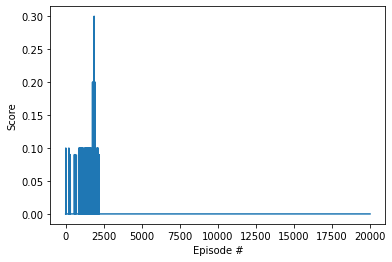


///// Beginning training set  RE27.36  with:
      Bad step prob    = 0.0147
      Noise decay      = 0.999985
      Noise scale      = 0.003
      LR actor         = 0.000042
      LR critic        = 0.000052
      Learning every      24  time steps
      Learn iterations =  2
      Tau              = 0.00070
      Seed             =  44939
2000	Average score:   0.000,        mem:   1388/     5 ( 0.4%), avg 1214.0 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1828/    31 ( 1.7%), avg 1268.8 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   2237/    31 ( 1.4%), avg 1333.6 eps/min;  0.2 hr rem   
7148	Running avg/max: 0.000/0.000,  mem:   2499/    31 ( 1.2%), avg 1345.6 eps/min    *noise mult = 0.2
 *noise mult = 0.2
8000	Average score:   0.000,        mem:   2661/    31 ( 1.2%), avg 1354.0 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:   3065/    31 ( 1.0%), avg 1367.1 eps/min;  0.1 hr rem   
12000	Average score:   0.000,       

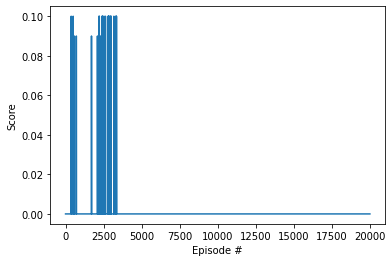


///// Beginning training set  RE27.37  with:
      Bad step prob    = 0.1183
      Noise decay      = 0.999925
      Noise scale      = 0.036
      LR actor         = 0.000082
      LR critic        = 0.000025
      Learning every      74  time steps
      Learn iterations =  4
      Tau              = 0.00278
      Seed             =  44939
1354	Running avg/max: 0.000/0.000,  mem:   2453/    55 ( 2.2%), avg 797.4 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.000,        mem:   3559/    55 ( 1.5%), avg 821.3 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   6948/    55 ( 0.8%), avg 850.9 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:  10232/    55 ( 0.5%), avg 859.2 eps/min;  0.3 hr rem   
6972	Running avg/max: 0.000/0.000,  mem:  11766/    55 ( 0.5%), avg 846.8 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
8000	Average score:   0.000,        mem:  13454/    55 ( 0.4%), avg 834.3 eps/min;  0.2 hr rem   
10000	Average

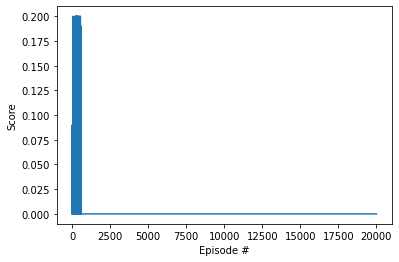


///// Beginning training set  RE27.38  with:
      Bad step prob    = 0.1459
      Noise decay      = 0.999903
      Noise scale      = 0.015
      LR actor         = 0.000016
      LR critic        = 0.000031
      Learning every      92  time steps
      Learn iterations =  2
      Tau              = 0.00280
      Seed             =  44939
877	Running avg/max: 0.009/0.100,  mem:   1984/    73 ( 3.7%), avg 732.7 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.004,        mem:   5240/   115 ( 2.2%), avg 722.8 eps/min;  0.4 hr rem   
4000	Average score:   0.000,        mem:   9779/   144 ( 1.5%), avg 815.6 eps/min;  0.3 hr rem   
4629	Running avg/max: 0.000/0.000,  mem:  11081/   144 ( 1.3%), avg 836.0 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
6000	Average score:   0.000,        mem:  13929/   144 ( 1.0%), avg 857.0 eps/min;  0.3 hr rem   
8000	Average score:   0.000,        mem:  17294/   144 ( 0.8%), avg 885.2 eps/min;  0.2 hr rem   
10000	Average 

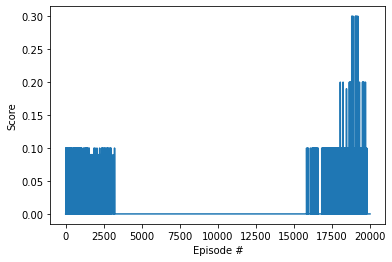


///// Beginning training set  RE27.39  with:
      Bad step prob    = 0.0337
      Noise decay      = 0.999946
      Noise scale      = 0.048
      LR actor         = 0.000030
      LR critic        = 0.000024
      Learning every      84  time steps
      Learn iterations =  2
      Tau              = 0.00182
      Seed             =  44939
1622	Running avg/max: 0.001/0.090,  mem:   1702/    35 ( 2.1%), avg 948.8 eps/min    *noise mult = 0.2
 *noise mult = 0.2
2000	Average score:   0.001,        mem:   1958/    41 ( 2.1%), avg 937.5 eps/min;  0.3 hr rem   
4000	Average score:   0.009,        mem:   3226/   107 ( 3.3%), avg 963.5 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   4233/   120 ( 2.8%), avg 1043.6 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   5191/   120 ( 2.3%), avg 1094.4 eps/min;  0.2 hr rem   
8733	Running avg/max: 0.000/0.000,  mem:   5545/   120 ( 2.2%), avg 1109.5 eps/min    *noise mult = 0.0005
 *noise mult = 0.0005
10000	Aver

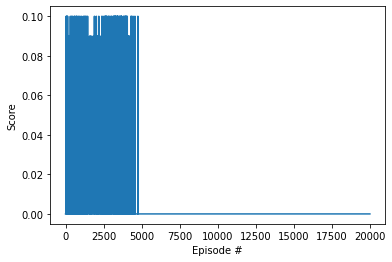



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them
# Use a random search for the hyperparams

EXPLORE = True

TIME_STEPS         = 200
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX     = "RE27"
    EPISODES       = 20001
    NUM_RUNS       = 40
    BATCH          = 1000
    WEIGHT_DECAY   = 1.0e-5
    GAMMA          = 0.99
    SEED           = 44939 #(0, 111, 468, 5555, 23100, 44939)
    #BAD_STEP_PROB  = 0.01
    #NOISE_DECAY    = 1.0 #need to test 0.99999; 0.9999 is too small
    #NOISE_SCALE    = 0.001
    
    # session variables:
    vars = [["continuous-float", 0.01,    0.2],     #BAD_STEP_PROB
            ["continuous-float", 0.9999,  1.0],     #NOISE_DECAY
            ["continuous-float", 0.001,   0.05],    #NOISE_SCALE
            ["continuous-float", 0.00001, 0.0001],  #LR_ACTOR
            ["continuous-float", 0.000005, 0.00008],#LR_CRITIC
            ["continuous-int",   20,      100],     #LEARN_EVERY
            ["continuous-int",   1,       5],       #LEARN_ITER
            ["continuous-float", 0.0005,  0.003]   #TAU
           ]
    rs = RandomSampler(vars)
    
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, NUM_RUNS, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Batch size    = ", BATCH)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
            
    for set_id in range(NUM_RUNS):
        
        # sample the variables
        v = rs.sample()
        BAD_STEP_PROB = v[0]
        NOISE_DECAY   = v[1]
        NOISE_SCALE   = v[2]
        LR_ACTOR      = v[3]
        LR_CRITIC     = v[4]
        LEARN_EVERY   = v[5]
        LEARN_ITER    = v[6]
        TAU           = v[7]

        # set the replay buffer size to that it fills after ~5000 bad episodes
        # (at ~14 experiences/episode), based on the bad step retention rate
        buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))

        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
        print("\n///// Beginning training set ", RUN_NAME, " with:")
        print("      Bad step prob    = {:.4f}".format(BAD_STEP_PROB))
        print("      Noise decay      = {:.6f}".format(NOISE_DECAY))
        print("      Noise scale      = {:.3f}".format(NOISE_SCALE))
        print("      LR actor         = {:.6f}".format(LR_ACTOR))
        print("      LR critic        = {:.6f}".format(LR_CRITIC))
        print("      Learning every     ", LEARN_EVERY, " time steps")
        print("      Learn iterations = ", LEARN_ITER)
        print("      Tau              = {:.5f}".format(TAU))
        print("      Seed             = ", SEED)

        ##### instantiate the agents and perform the training

        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                        noise_decay=NOISE_DECAY, learn_every=LEARN_EVERY, 
                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                        tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                       winning_score=0.5, max_time_steps=TIME_STEPS,
                       checkpoint_interval=2000)

        ##### plot the training reward history

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()

        ##### store the action/noise data, if being used

        if SAVE_ANALYSIS:
            maddpg.save_anal_data(RUN_PREFIX)

                            
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [4]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform

#m = Maddpg(24, 2, 2)
#check = m.restore_checkpoint("checkpoint/", "TEST.00", 20)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [6]:
env.close()